[-2.08157443e-04  1.89549391e+02  1.89592292e+02 -9.61778613e+02
  6.52600485e-03 -1.70092171e-02 -4.26782636e-02  1.28521853e-02
 -2.74384977e-03 -6.80426290e-03  3.83495668e-03 -1.79352530e-03
 -6.77295416e-03 -2.20616150e-03  1.99943321e-03 -2.86824494e-03
  9.36764068e-04  4.00154618e-03]
[-0.00050209 -0.          0.          0.          0.00571855 -0.01535424
 -0.03429713  0.         -0.         -0.          0.          0.
 -0.         -0.          0.         -0.          0.          0.        ]
[-2.11406243e-04  2.01786743e-01  2.47908397e-01  8.82932743e-02
  6.52402090e-03 -1.70029861e-02 -4.26565435e-02  1.27412727e-02
 -2.73840092e-03 -6.86460969e-03  3.90406236e-03 -1.72085977e-03
 -6.78447013e-03 -2.19400562e-03  1.96564673e-03 -2.81597130e-03
  9.86660096e-04  4.06327165e-03]


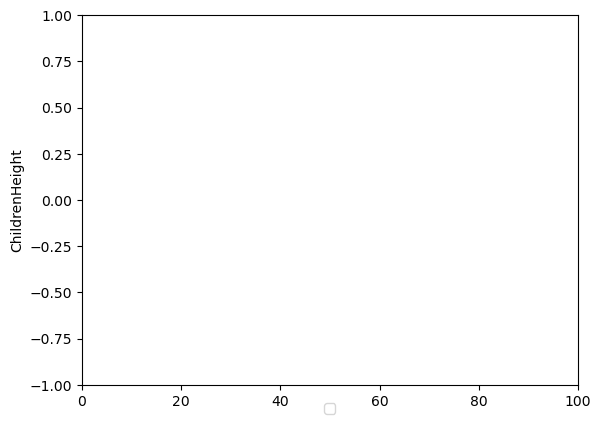

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


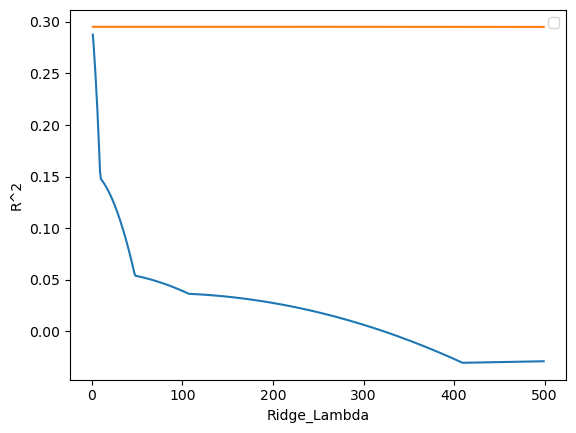

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


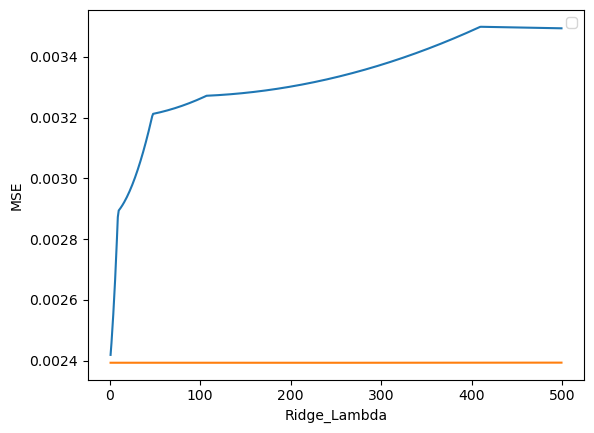

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


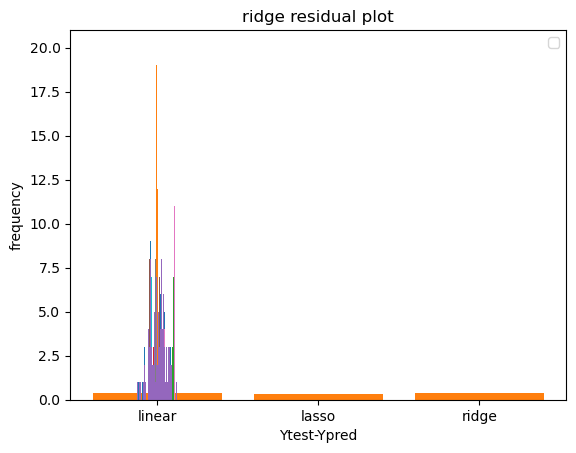

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler as ms

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# Importing the dataset
dataset = pd.read_csv('GaltonHeight.csv')
X = dataset.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]].values
y = dataset.iloc[:, 19].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 0)

## Normal Linear Regression
linear = LinearRegression()
linear.fit(X_train,y_train)


## Selection of lambda based on R^2
lasso_alpha = pd.DataFrame(columns=['alpha', 'R^2'])
ridge_alpha = pd.DataFrame(columns=['alpha', 'R^2'])

for i in range(1,500):
    lasso = Lasso(alpha=i/10000)
    lasso.fit(X_train,y_train)
    lasso_alpha = lasso_alpha.append({'alpha':i, 'R^2':r2_score(y_test, lasso.predict(X_test))},ignore_index=True)
    
for i in range(1,500):
    ridge = Ridge(alpha=i/10000)
    ridge.fit(X_train,y_train)
    ridge_alpha = ridge_alpha.append({'alpha':i, 'R^2':r2_score(y_test, ridge.predict(X_test))},ignore_index=True)
    
    
    
## Selection of lambda based on MSE
lasso_alpha_1 = pd.DataFrame(columns=['alpha', 'MSE'])
ridge_alpha_1 = pd.DataFrame(columns=['alpha', 'MSE'])


for i in range(1,500):
    lasso = Lasso(alpha=i/10000)
    lasso.fit(X_train,y_train)
    lasso_alpha_1 = lasso_alpha_1.append({'alpha':i, 'MSE': mean_squared_error(y_test, lasso.predict(X_test))},ignore_index=True)
    
for i in range(1,500):
    ridge = Ridge(alpha=i/10000)
    ridge.fit(X_train,y_train)
    ridge_alpha_1 = ridge_alpha_1.append({'alpha':i, 'MSE': mean_squared_error(y_test, ridge.predict(X_test))},ignore_index=True)

## Lasso Regression
lasso = Lasso(alpha = 0.001)
lasso.fit(X_train,y_train)
    

## Ridge Regression
ridge = Ridge(alpha = 0.001)
ridge.fit(X_train,y_train)


## expected value from regression

linear_y = linear.predict(X_test)
lasso_y = lasso.predict(X_test)
lasso_y = np.reshape(lasso_y,(-1,1))
ridge_y = ridge.predict(X_test)


## check performance on training set (R^2)
s1 = [[r2_score(y_train, linear.predict(X_train)), r2_score(y_train, lasso.predict(X_train)), r2_score(y_train, ridge.predict(X_train))]]
train_perform = pd.DataFrame(s1, columns = ['linear', 'lasso', 'ridge'])

## check performance on testing set (R^2)
s2 = [[r2_score(y_test, linear.predict(X_test)), r2_score(y_test, lasso.predict(X_test)), r2_score(y_test, ridge.predict(X_test))]]
test_perform = pd.DataFrame(s2, columns = ['linear', 'lasso', 'ridge'])

## print coefficients
print(linear.coef_)
print(lasso.coef_)
print(ridge.coef_)


plt.plot(y_test,lw=2, label = 'true')
plt.plot(linear_y, lw=2, label = 'linear')
plt.plot(lasso_y, lw=2, label = 'lasso')
plt.plot(ridge_y, color='brown', lw=1, label = 'ridge')
plt.xlim([0,100])
plt.ylim([-1,1])
plt.ylabel('ChildrenHeight')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.03), fancybox=True, ncol=5, labels=[])
plt.show()




plt.plot(lasso_alpha['alpha'],lasso_alpha['R^2'])
plt.xlabel("Lasso_Lambda")
plt.ylabel("R^2")
plt.plot(ridge_alpha['alpha'],ridge_alpha['R^2'])
plt.xlabel("Ridge_Lambda")
plt.ylabel("R^2")
plt.legend()
plt.show()

plt.plot(lasso_alpha_1['alpha'],lasso_alpha_1['MSE'])
plt.xlabel("Lasso_Lambda")
plt.ylabel("MSE")
plt.plot(ridge_alpha_1['alpha'],ridge_alpha_1['MSE'])
plt.xlabel("Ridge_Lambda")
plt.ylabel("MSE")
plt.legend()
plt.show()

## barchart for R^2
y_pos = np.arange(len(test_perform.columns))
plt.bar(y_pos, height = [test_perform.iloc[0,0], test_perform.iloc[0,1], test_perform.iloc[0,2]] )
plt.xticks(y_pos, ['linear', 'lasso', 'ridge'])
plt.ylabel('R^2')

y_pos = np.arange(len(train_perform.columns))
plt.bar(y_pos, height = [train_perform.iloc[0,0], train_perform.iloc[0,1], train_perform.iloc[0,2]] )
plt.xticks(y_pos, ['linear', 'lasso', 'ridge'])
plt.ylabel('R^2')

## histogram for residual 
r1 = y_test-linear_y
r2 = y_test-lasso_y
r3 = y_test-ridge_y


plt.hist(r1, bins = 40)
plt.xlabel('Ytest-Ypred')
plt.ylabel('frequency')
plt.title('linear residual plot')

plt.hist(r2, bins = 40)
plt.xlabel('Ytest-Ypred')
plt.ylabel('frequency')
plt.title(' lasso residual plot')

plt.hist(r3, bins = 40)
plt.xlabel('Ytest-Ypred')
plt.ylabel('frequency')
plt.title('ridge residual plot')

plt.legend()
plt.show()

## coefficients
coef = pd.DataFrame(columns=['variable','linear_coef','lasso_coef','ridge_coef'])
coef['linear_coef']=linear.coef_[0]
coef['lasso_coef']=lasso.coef_
coef['ridge_coef']=ridge.coef_[0]
coef = coef.round(3)



Computing regularization path using the LARS ...
.

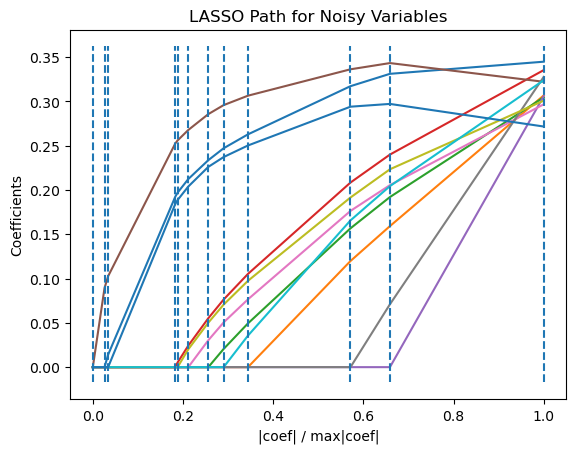

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler as ms
from sklearn import linear_model


# Importing the dataset
dataset = pd.read_csv('GaltonHeight.csv')
X = dataset.iloc[:, [8,9,10,11,12,13,14,15,16,17,18]].values
y = dataset.iloc[:, 19].values

print("Computing regularization path using the LARS ...")
_, _, coefs = linear_model.lars_path(X, y, method="lasso", verbose=True)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle="dashed")
plt.xlabel("|coef| / max|coef|")
plt.ylabel("Coefficients")
plt.title("LASSO Path for Noisy Variables")
plt.axis("tight")
plt.show()

Computing regularization path using the LARS ...
.

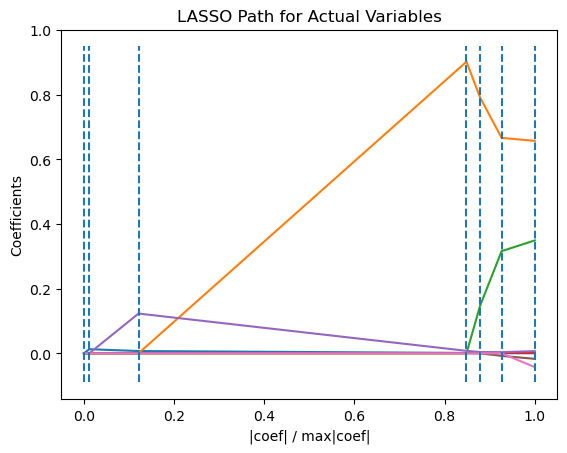

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler as ms
from sklearn import linear_model


# Importing the dataset
dataset = pd.read_csv('GaltonHeight.csv')
X = dataset.iloc[:, [1,2,3,4,5,6,7]].values
y = dataset.iloc[:, 19].values

print("Computing regularization path using the LARS ...")
_, _, coefs = linear_model.lars_path(X, y, method="lasso", verbose=True)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle="dashed")
plt.xlabel("|coef| / max|coef|")
plt.ylabel("Coefficients")
plt.title("LASSO Path for Actual Variables")
plt.axis("tight")
plt.show()

In [4]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('GaltonHeight.csv')
X = dataset.iloc[:, [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]].values
Y = dataset.iloc[:, 19].values
print(X)
names = ['father','mother','midParent','childrenNumber','childNo.','gender','RandomNoise','RandomNoise','RandomNoise','RandomNoise','RandomNoise','RandomNoise','RandomNoise','RandomNoise','RandomNoise','RandomNoise','RandomNoise']

# Create a function called lasso,
def lasso(alphas):
    '''
    Takes in a list of alphas. Outputs a dataframe containing the coefficients of lasso regressions from each alpha.
    '''
    # Create an empty data frame
    df = pd.DataFrame()
    
    # Create a column of feature names
    df['Feature Name'] = names
    
    # For each alpha value in the list of alpha values,
    for alpha in alphas:
        # Create a lasso regression with that alpha value,
        lasso = Lasso(alpha=alpha)
        
        # Fit the lasso regression
        lasso.fit(X, Y)
        
        # Create a column name for that alpha value
        column_name = 'Alpha = %f' % alpha

        # Create a column of coefficient values
        df[column_name] = lasso.coef_
        
    # Return the datafram    
    return df

# Run the function called, Lasso
lasso([0,.00001,.0001, .0005,.005,0.01,0.05,0.1])


[[1.9939     1.83794    0.7543     ... 0.68614093 0.08898549 0.08075387]
 [1.9939     1.83794    0.7543     ... 0.17882731 0.60594086 0.3523171 ]
 [1.9939     1.83794    0.7543     ... 0.1386517  0.22341281 0.68281686]
 ...
 [1.6002     1.74193    0.6579     ... 0.28116331 0.05547243 0.68543667]
 [1.6002     1.74193    0.6579     ... 0.43640862 0.14032341 0.26109977]
 [1.5748     1.81051    0.6664     ... 0.69959764 0.0888957  0.86748144]]


C:\Users\41227\AppData\Local\Temp\ipykernel_1548\62600449.py:30: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X, Y)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
D:\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.194e+00, tolerance: 3.966e-04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


,Feature Name,Alpha = 0.000000,Alpha = 0.000010,Alpha = 0.000100,Alpha = 0.000500,Alpha = 0.005000,Alpha = 0.010000,Alpha = 0.050000,Alpha = 0.100000
0,father,0.390468,0.378177,0.354867,0.252020,0.000000,0.000000,0.0,0.0
1,mother,0.307817,0.295631,0.273275,0.176230,0.000000,0.000000,0.0,0.0
2,midParent,-0.049286,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
3,childrenNumber,0.006619,0.006601,0.006441,0.005727,0.000318,0.000000,-0.0,-0.0
4,childNo.,-0.017091,-0.017081,-0.016998,-0.016551,-0.008275,-0.006773,-0.0,-0.0
5,gender,-0.043193,-0.043145,-0.042716,-0.040635,-0.003208,-0.000000,-0.0,-0.0
6,RandomNoise,0.012618,0.012426,0.010697,0.003696,0.000000,0.000000,0.0,0.0
7,RandomNoise,-0.004681,-0.004587,-0.003745,-0.000250,-0.000000,-0.000000,-0.0,-0.0
8,RandomNoise,-0.004773,-0.004618,-0.003226,-0.000000,-0.000000,-0.000000,-0.0,-0.0
9,RandomNoise,0.004625,0.004528,0.003652,0.000000,0.000000,0.000000,0.0,0.0


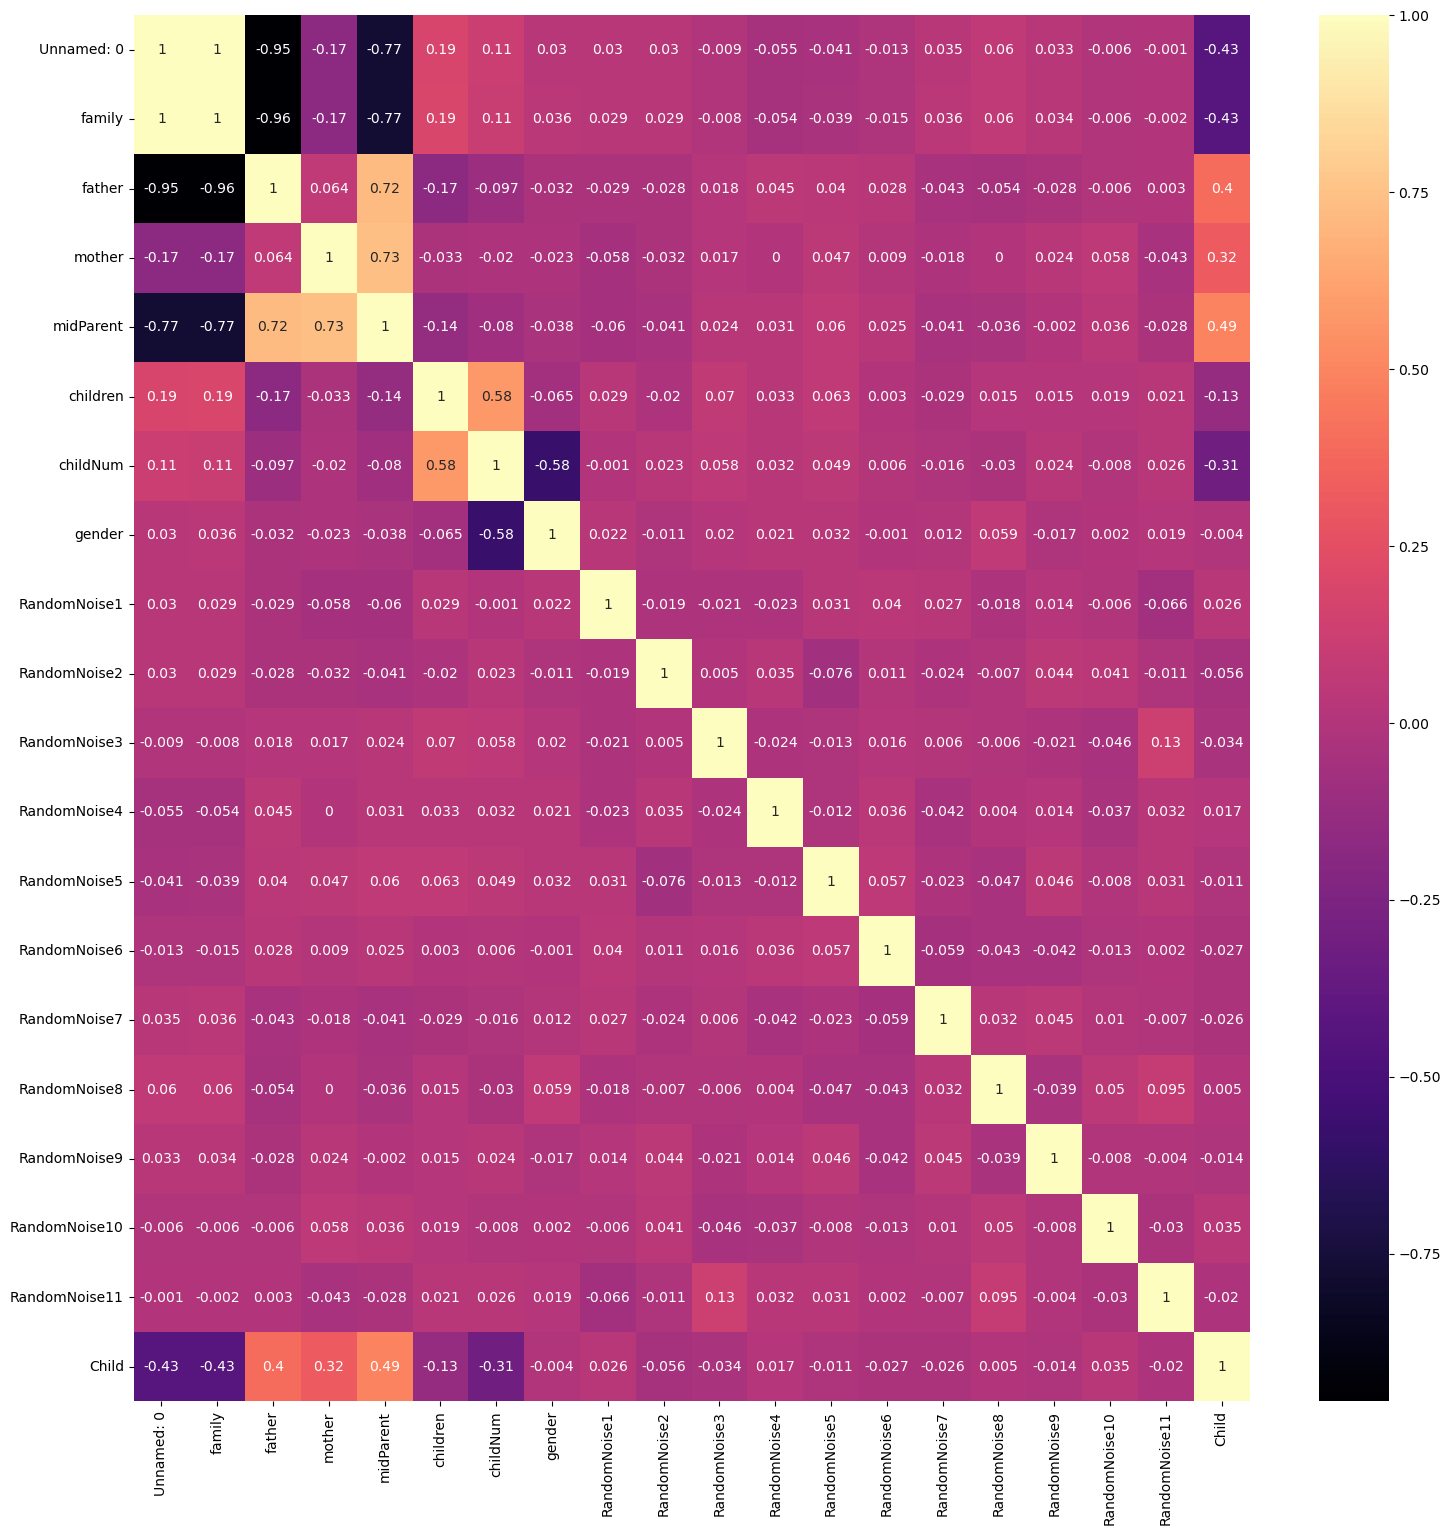

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset
data = pd.read_csv('GaltonHeight.csv')

#remove any data that doesn't have any information attached
data.dropna(thresh = 3, inplace = True)

data.dropna(axis = 1, inplace = True)
#create a correlation matrix
corrMatrix = dataset.corr()

#create the base axis for the plot
fig, ax = plt.subplots(1,1, figsize = (18,18))

#create a sns heatmap
sns.heatmap(corrMatrix.round(3), annot = True,
           ax = ax, cmap = "magma")

#show the plot
plt.show()


Computing regularization path using the lasso...


(-0.10580368787525893,
 3.194196312124741,
 -0.017237432702783165,
 0.36198608675844646)

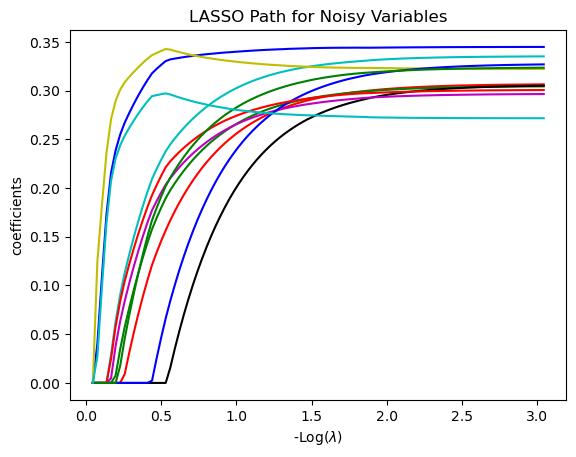

In [6]:
import pandas as pd
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import lasso_path, enet_path
from copy import deepcopy


# Importing the dataset
dataset = pd.read_csv('GaltonHeight.csv')
X = dataset.iloc[:, [8,9,10,11,12,13,14,15,16,17,18]].values
y = dataset.iloc[:, 19].values

eps = 6e-6  # the smaller it is the longer is the path

print("Computing regularization path using the lasso...")
lambdas_lasso, coefs_lasso, _ = lasso_path( X,y)

# Display results

plt.figure(1)
colors = cycle(['b', 'r', 'g', 'c', 'k', 'y','m'])
neg_log_lambdas_lasso = -np.log10(lambdas_lasso)
for coef_l, c in zip(coefs_lasso, colors):
    l1 = plt.plot(neg_log_lambdas_lasso, coef_l, c=c)

plt.xlabel('-Log($\lambda$)')
plt.ylabel('coefficients')
plt.title('LASSO Path for Noisy Variables')
plt.axis('tight')

Computing regularization path using the lasso...


(-2.413289615890177,
 0.8867103841098232,
 -0.03045609310449798,
 0.6395779551944575)

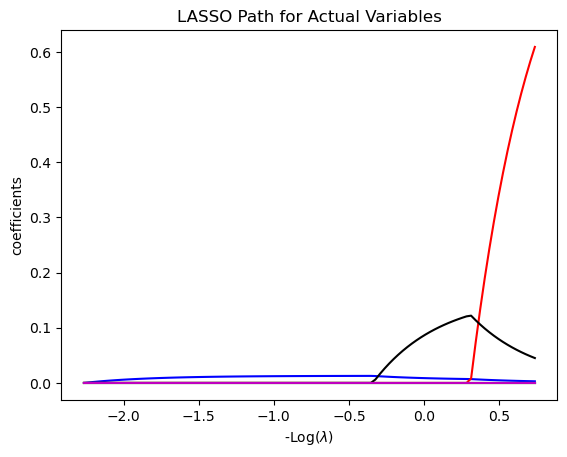

In [7]:
import pandas as pd
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import lasso_path, enet_path
from copy import deepcopy


# Importing the dataset
dataset = pd.read_csv('GaltonHeight.csv')
X = dataset.iloc[:, [1,2,3,4,5,6,7]].values
y = dataset.iloc[:, 19].values

eps = 6e-5  # the smaller it is the longer is the path

print("Computing regularization path using the lasso...")
lambdas_lasso, coefs_lasso, _ = lasso_path( X,y)

# Display results

plt.figure(1)
colors = cycle(['b', 'r', 'g', 'c', 'k', 'y','m'])
neg_log_lambdas_lasso = -np.log10(lambdas_lasso)
for coef_l, c in zip(coefs_lasso, colors):
    l1 = plt.plot(neg_log_lambdas_lasso, coef_l, c=c)

plt.xlabel('-Log($\lambda$)')
plt.ylabel('coefficients')
plt.title('LASSO Path for Actual Variables')
plt.axis('tight')